In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

In [26]:
all_df = pd.read_csv('covid_19_data.csv' ,  names=['SNo','ObservationDate','Province/State','Country/Region','Last Update','Confirmed','Deaths','Recovered'], header=0)
all_df.drop(['Province/State', 'Last Update'], inplace = True, axis=1)

In [27]:
grouped_sl = all_df[all_df['Country/Region'] == "Sri Lanka"].reset_index()
grouped_sl.head()

,index,SNo,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,263,264,01/27/2020,Sri Lanka,1.0,0.0,0.0
1,315,316,01/28/2020,Sri Lanka,1.0,0.0,0.0
2,367,368,01/29/2020,Sri Lanka,1.0,0.0,0.0
3,422,423,01/30/2020,Sri Lanka,1.0,0.0,0.0
4,488,489,01/31/2020,Sri Lanka,1.0,0.0,0.0


In [28]:
grouped_sl.rename(columns={"ObservationDate": "Date", "Country/Region": "Country"})

,index,SNo,Date,Country,Confirmed,Deaths,Recovered
0,263,264,01/27/2020,Sri Lanka,1.0,0.0,0.0
1,315,316,01/28/2020,Sri Lanka,1.0,0.0,0.0
2,367,368,01/29/2020,Sri Lanka,1.0,0.0,0.0
3,422,423,01/30/2020,Sri Lanka,1.0,0.0,0.0
4,488,489,01/31/2020,Sri Lanka,1.0,0.0,0.0
5,552,553,02/01/2020,Sri Lanka,1.0,0.0,0.0
6,619,620,02/02/2020,Sri Lanka,1.0,0.0,0.0
7,688,689,02/03/2020,Sri Lanka,1.0,0.0,0.0
8,758,759,02/04/2020,Sri Lanka,1.0,0.0,0.0
9,828,829,02/05/2020,Sri Lanka,1.0,0.0,0.0


In [29]:
grouped_sl = pd.pivot_table(grouped_sl, values=['Confirmed', 'Deaths','Recovered'], index=['ObservationDate'], aggfunc=np.sum)
grouped_sl.tail()

,Confirmed,Deaths,Recovered
ObservationDate,,,
04/12/2020,210.0,7.0,56.0
04/13/2020,217.0,7.0,56.0
04/14/2020,233.0,7.0,61.0
04/15/2020,238.0,7.0,63.0
04/16/2020,238.0,7.0,68.0


In [30]:
x_data = range(len(grouped_sl.index))
y_data = grouped_sl['Confirmed']



# I will want x_data to be the number of days since first confirmed and the y_data to be the confirmed data. This will be the data we use to fit a logistic curve
def log_curve(x, k, x_0, ymax):
    return ymax / (1 + np.exp(-k*(x-x_0)))

# Fit the curve
popt, pcov = curve_fit(log_curve, x_data, y_data, bounds=([0,0,0],np.inf), maxfev=50000)
estimated_k, estimated_x_0, ymax= popt


# Plot the fitted curve
k = estimated_k
x_0 = estimated_x_0
y_fitted = log_curve(x_data, k, x_0, ymax)
print(k, x_0, ymax)
y_data.tail()

0.14299423488770294 61.34149364890195 237.66035501752972


ObservationDate
04/12/2020    210.0
04/13/2020    217.0
04/14/2020    233.0
04/15/2020    238.0
04/16/2020    238.0
Name: Confirmed, dtype: float64

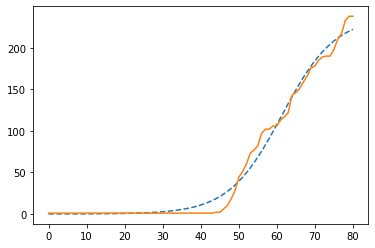

In [31]:
# Plot everything for illustration
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_data, y_fitted, '--', label='fitted')
ax.plot(x_data, y_data, label='Confirmed Data')

In [32]:
# This functions smooths data, thanks to Dan Pearson. We will use it to smooth the data for growth factor
def smoother(inputdata,w,imax):
    data = 1.0*inputdata
    data = data.replace(np.nan,1)
    data = data.replace(np.inf,1)
    #print(data)
    smoothed = 1.0*data
    normalization = 1
    for i in range(-imax,imax+1):
        if i==0:
            continue
        smoothed += (w**abs(i))*data.shift(i,axis=0)
        normalization += w**abs(i)
    smoothed /= normalization
    return smoothed

In [33]:
#growth factor
def growth_factor(confirmed):
    confirmed_iminus1 = confirmed.shift(1, axis=0)
    confirmed_iminus2 = confirmed.shift(2, axis=0)
    return (confirmed-confirmed_iminus1)/(confirmed_iminus1-confirmed_iminus2)

In [34]:
w = 0.5
grouped_sl['GrowthFactor'] = growth_factor(grouped_sl['Confirmed'])
grouped_sl['GrowthFactor'] = smoother(grouped_sl['GrowthFactor'],w,5)

In [35]:
# horizontal line at growth rate 1.0 for reference
x_coordinates = [1, 100]
y_coordinates = [1, 1]

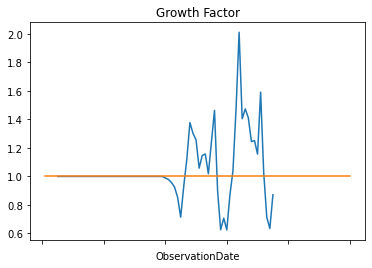

In [36]:
grouped_sl['GrowthFactor'].plot(title='Growth Factor')
plt.plot(x_coordinates, y_coordinates) 
plt.show()

In [37]:
def growth_ratio(confirmed):
    confirmed_iminus1 = confirmed.shift(1, axis=0)
    return (confirmed/confirmed_iminus1)

In [38]:
#Plot confirmed[i]/confirmed[i-1], this is called the growth ratio
grouped_sl['GrowthRatio'] = growth_ratio(grouped_sl['Confirmed'])
grouped_sl['GrowthRatio'] = smoother(grouped_sl['GrowthRatio'],w,5)

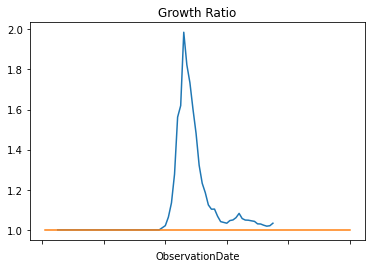

In [39]:
grouped_sl['GrowthRatio'].plot(title='Growth Ratio')
plt.plot(x_coordinates, y_coordinates)
plt.show()

In [40]:
#Plot the growth rate, we will define this as k in the logistic function presented at the beginning of this notebook.
grouped_sl['GrowthRate']=np.gradient(np.log(grouped_sl['Confirmed']))
grouped_sl['GrowthRate'] = smoother(grouped_sl['GrowthRate'],0.5,3)

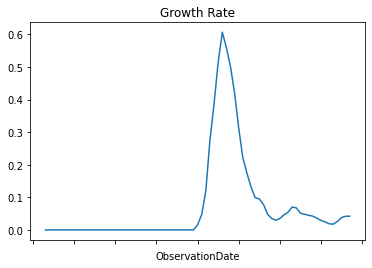

In [41]:
grouped_sl['GrowthRate'].plot(title='Growth Rate')
plt.show()

In [42]:
# 2nd Derivative
grouped_sl['2nd_Derivative'] = np.gradient(np.gradient(grouped_sl['Confirmed'])) #2nd derivative
grouped_sl['2nd_Derivative'] = smoother(grouped_sl['2nd_Derivative'],w,7)

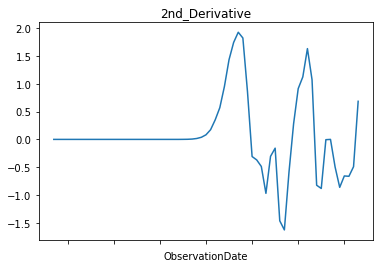

In [43]:
grouped_sl['2nd_Derivative'].plot(title='2nd_Derivative')
plt.show()